# Analysis of correct answers

In [3]:
import pandas as pd

df_google = pd.read_excel('data/google1.xlsx')
df_gpt = pd.read_excel('data/chat_gpt1.xlsx')

# set id to index
df_google.set_index('ID', inplace=True)
df_gpt.set_index('ID', inplace=True)

# drop columns
df_google.drop(columns=['Email', 'Name', 'Quiz feedback'], inplace=True)
df_gpt.drop(columns=['Email', 'Name', 'Quiz feedback', 'Last modified time'], inplace=True)

# remove columns starting with "Feedback"
df_google = df_google.loc[:, ~df_google.columns.str.startswith('Feedback')]
df_gpt = df_gpt.loc[:, ~df_gpt.columns.str.startswith('Feedback')]

# Save for later
df_google_copy = df_google.copy()
df_gpt_copy = df_gpt.copy()

# only keep columns starting with "Points"
df_google = df_google.loc[:, df_google.columns.str.startswith('Points')]
df_gpt = df_gpt.loc[:, df_gpt.columns.str.startswith('Points')]

# Replace column names with the question number
df_google.columns = [f'Q{i+1}' for i in range(len(df_google.columns))]
df_gpt.columns = [f'Q{i+1}' for i in range(len(df_gpt.columns))]

# Calculate the total points
df_google['Total'] = df_google.sum(axis=1)
df_gpt['Total'] = df_gpt.sum(axis=1)


In [4]:
import matplotlib
print(matplotlib.__version__)

3.9.2


In [5]:
# Summary statistics 
print("Google")
display(df_google["Total"].describe())

Google


count    13.000000
mean     12.461538
std       2.665064
min       8.000000
25%      11.000000
50%      13.000000
75%      15.000000
max      16.000000
Name: Total, dtype: float64

In [6]:
print("GPT")
display(df_gpt["Total"].describe())

GPT


count    12.000000
mean     11.416667
std       1.621354
min       8.000000
25%      10.750000
50%      12.000000
75%      12.250000
max      13.000000
Name: Total, dtype: float64

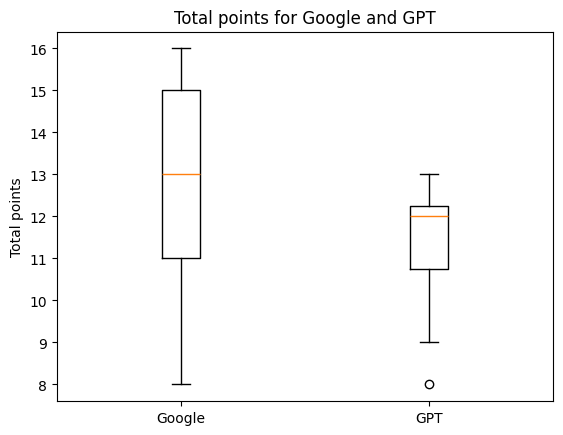

In [7]:
# Make box plot over total 
import matplotlib.pyplot as plt
plt.boxplot([df_google["Total"], df_gpt["Total"]], tick_labels=["Google", "GPT"])
plt.ylabel("Total points")
plt.title("Total points for Google and GPT")
plt.show()


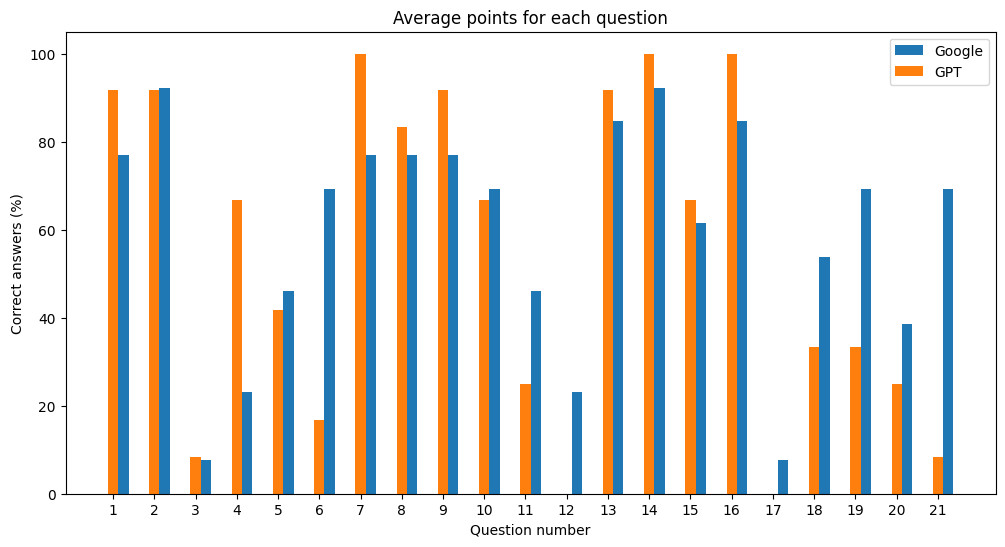

In [8]:
# Make bar plot of points in each question
import numpy as np
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(1, len(df_google.columns))
ax.bar(x+0.25, df_google.iloc[:,:-1].sum(axis=0) /len(df_google.index) * 100, label="Google", width=0.25)
ax.bar(x, df_gpt.iloc[:,:-1].sum(axis=0) /len(df_gpt.index) * 100, label="GPT", width=0.25)
ax.set_xticks(x)
ax.set_xlabel("Question number")
ax.set_ylabel("Correct answers (%)")
ax.set_title("Average points for each question")
ax.legend()
plt.show()

# Analysis of "Don't Know" answers

In [9]:
# Get all the don't knows
answers_google = df_google_copy.iloc[:,3:]
answers_gpt = df_gpt_copy.iloc[:,3:]

# get every other column
answers_google = answers_google.iloc[:,::2]
answers_gpt = answers_gpt.iloc[:,::2]

# rename to question number
answers_google.columns = [f'Dont know Q{i+1}' for i in range(len(answers_google.columns))]
answers_gpt.columns = [f'Dont know Q{i+1}' for i in range(len(answers_gpt.columns))]

# Replace all the answers with 0 unless it is "Don't know"
answers_google = answers_google.map(lambda x: 1 if x == "Don't know" else 0)
answers_gpt = answers_gpt.map(lambda x: 1 if x == "Don't know" else 0)

# Calculate the total don't knows
answers_google['Total'] = answers_google.sum(axis=1)
answers_gpt['Total'] = answers_gpt.sum(axis=1)

In [10]:
# Summary statistics
print("Google")
display(answers_google["Total"].describe())

Google


count    13.000000
mean      2.153846
std       2.882307
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max      10.000000
Name: Total, dtype: float64

In [11]:
# Summary statistics
print("GPT")
display(answers_gpt["Total"].describe())

GPT


count    12.000000
mean      3.833333
std       3.537676
min       0.000000
25%       0.750000
50%       3.000000
75%       6.500000
max      10.000000
Name: Total, dtype: float64

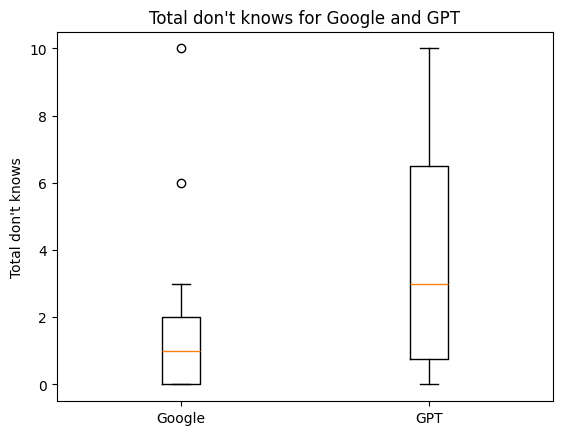

In [12]:
# make box plot
plt.boxplot([answers_google["Total"], answers_gpt["Total"]], tick_labels=["Google", "GPT"])
plt.ylabel("Total don't knows")
plt.title("Total don't knows for Google and GPT")
plt.show()


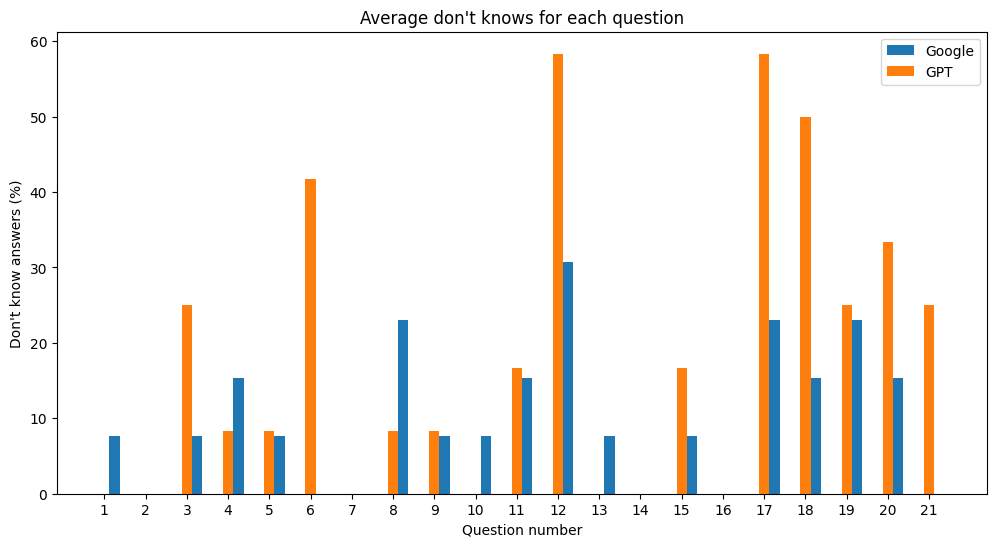

In [13]:
# Make bar plot of don't knows in each question
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(1, len(answers_google.columns))
ax.bar(x+0.25, answers_google.iloc[:,:-1].sum(axis=0) /len(answers_google.index) * 100, label="Google", width=0.25)
ax.bar(x, answers_gpt.iloc[:,:-1].sum(axis=0) /len(answers_gpt.index) * 100, label="GPT", width=0.25)
ax.set_xticks(x)
ax.set_xlabel("Question number")
ax.set_ylabel("Don't know answers (%)")
ax.set_title("Average don't knows for each question")
ax.legend()
plt.show()